2025-08-25 19:18:53.791473: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756149534.119605      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756149534.216511      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.


I0000 00:00:1756149658.956554      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756149658.957272      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1756149663.613555     121 service.cc:148] XLA service 0x78541400fd30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756149663.615179     121 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756149663.615199     121 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756149664.057737     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/375 ━━━━━━━━━━━━━━━━━━━━ 1:24:52 14s/step - accuracy: 0.4375 - loss: 1.1979

I0000 00:00:1756149674.880879     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 99s 229ms/step - accuracy: 0.7675 - loss: 1.1179 - val_accuracy: 0.9163 - val_loss: 0.2265
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 225ms/step - accuracy: 0.9005 - loss: 0.2631 - val_accuracy: 0.9283 - val_loss: 0.1887
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9183 - loss: 0.2124 - val_accuracy: 0.9340 - val_loss: 0.1659
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9125 - loss: 0.2237 - val_accuracy: 0.9490 - val_loss: 0.1372
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 228ms/step - accuracy: 0.9091 - loss: 0.2156 - val_accuracy: 0.9387 - val_loss: 0.1505
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 228ms/step - accuracy: 0.9295 - loss: 0.1896 - val_accuracy: 0.9500 - val_loss: 0.1209
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9257 - loss: 0.1771 - val_accuracy: 0.9493 - val_loss: 0.1273
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9338 - loss: 0.1576 - val

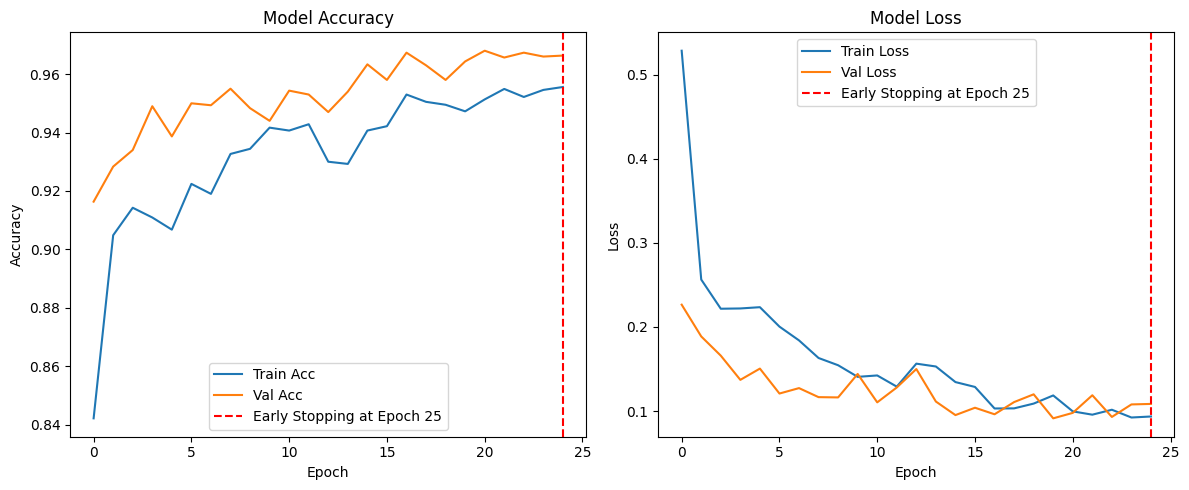

469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 182ms/step
📊 Classification Report:

              precision    recall  f1-score   support

brain_glioma       1.00      0.98      0.99      5000
 brain_menin       0.97      0.99      0.98      5000
 brain_tumor       0.99      0.99      0.99      5000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



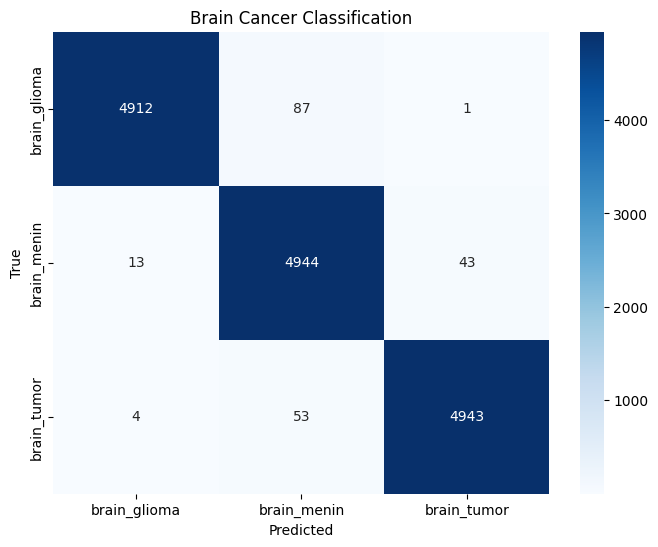

In [1]:
# Importing required libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
# NEW: Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# 1: Defining the original dataset path
original_path = "/kaggle/input/multi-cancer/Multi Cancer/Multi Cancer/Brain Cancer"

# 2: Copying dataset to a writable directory (if not already present)
base_path = "/kaggle/working/brain_cancer_data"
if not os.path.exists(base_path):
    shutil.copytree(original_path, base_path)

# 3: Using ImageDataGenerator to load and split the images
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Training generator (80%)
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation generator (20%)
validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Create a separate generator for the full test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 4: Defining the VGG16 model architecture
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.trainable = False

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# 5: Compiling the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# NEW: Define the EarlyStopping callback
# This will monitor the validation loss and stop training if it doesn't improve for 5 consecutive epochs.
# It will also restore the weights from the best epoch.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 6: Training the model with the EarlyStopping callback
# The number of epochs is set to 30, but it may stop earlier if performance plateaus.
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add the callback here
)

# 7: Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"❌ Test Loss: {test_loss:.4f}")

# 8: Plot training/validation accuracy and loss
plt.figure(figsize=(12, 5))

# Determine the number of actual epochs trained before stopping
actual_epochs = len(history.history['accuracy'])

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
# Add a vertical line to show where training was stopped early
if actual_epochs < 30:
    plt.axvline(x=actual_epochs - 1, color='r', linestyle='--', label=f'Early Stopping at Epoch {actual_epochs}')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
# Add a vertical line to show where training was stopped early
if actual_epochs < 30:
    plt.axvline(x=actual_epochs - 1, color='r', linestyle='--', label=f'Early Stopping at Epoch {actual_epochs}')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 9: Confusion Matrix and Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Brain Cancer Classification")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()